<a href="https://colab.research.google.com/github/surendra-crax/120Days-DataScience/blob/main/Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

upload = files.upload()

Saving titanic.csv to titanic.csv


In [4]:
#loading dataset
import pandas as pd
df = pd.read_csv("titanic.csv")

# STEP:1 Basic structure check

In [11]:
df.shape


(891, 12)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Key EDA Insights So Far

These are insights you will write in your project report:

- Dataset contains 891 passengers and 12 features.

- 5 categorical and 7 numeric columns.

- Age and Cabin have substantial missing values.

- Cabin is mostly missing → not useful without feature engineering.

- Fare shows large outliers → right-skewed distribution.

- Survival rate is 38% → target variable is imbalanced.

- Most passengers are in 3rd class.

## STEP:2 - Univariate Analysis: Numeric Columns Distribution

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

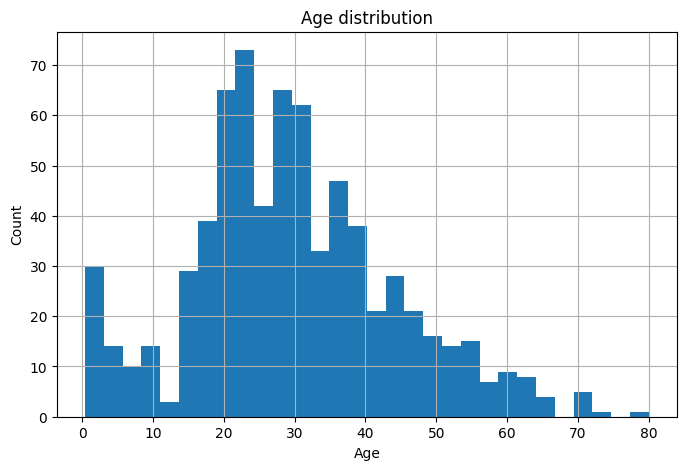

In [15]:
#AGE — Histogram + Interpretation
df["Age"].hist(bins=30,figsize=(8,5))
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


⭐ 1. AGE DISTRIBUTION (Histogram)
✔ Observations:

- Most passengers are aged 20 to 40.

- Fewer children (< 10) and fewer elderly (> 60).

- The distribution is slightly right-skewed because of ages up to 80.

- Missing 177 Age values cause some irregularity.

✔ Meaning:

- Titanic had mostly young and middle-aged passengers.

- Children and elderly were a small percentage.

- Age likely influences survival (children first).

- Imputation is needed before ML.

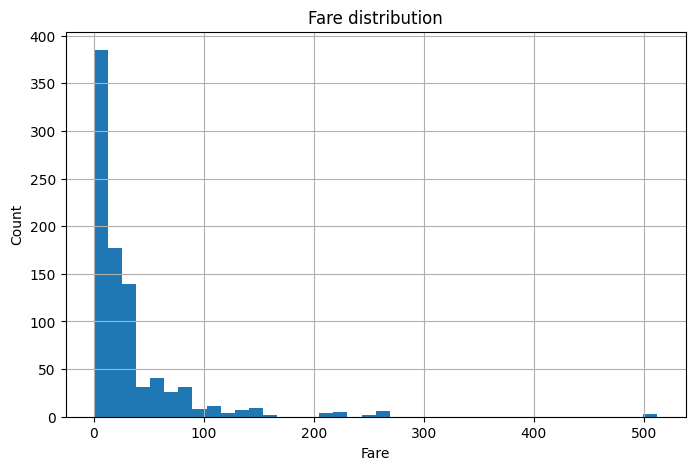

In [16]:
#FARE — Histogram + Interpretation
df["Fare"].hist(bins=40, figsize=(8,5))
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

⭐ 2. FARE DISTRIBUTION (Histogram)
✔ Observations:

- Highly right-skewed (big skew to the right).

- Most people paid low fares (< 50).

- A few outliers paid very high amounts (100 – 512).

- This matches the presence of first-class VIP tickets.

✔ Meaning:

- Fare strongly reflects class (rich vs poor).

- Data contains extreme outliers → important for feature scaling.

- Fare is a strong predictor of survival.

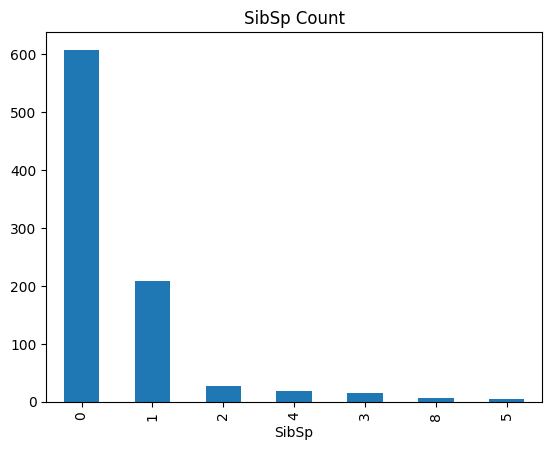

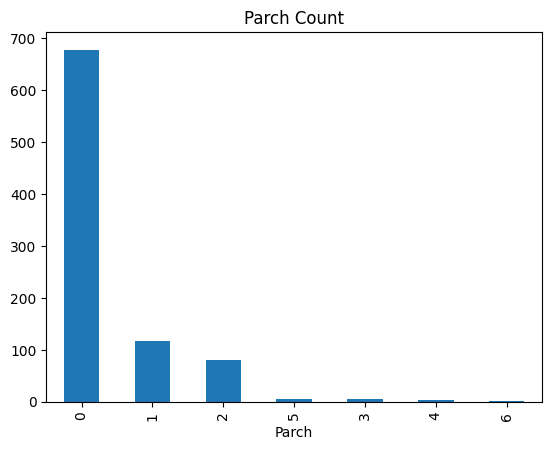

In [17]:
df["SibSp"].value_counts().plot(kind="bar")
plt.title("SibSp Count")
plt.show()

df["Parch"].value_counts().plot(kind="bar")
plt.title("Parch Count")
plt.show()


⭐ 3. SibSp (Siblings/Spouses) Count
✔ Observations:

- Majority (~600) traveled alone (0 siblings/spouse).

- Some (~200) traveled with 1 family member.

- Very few with large family sizes (3, 4, 5, 8).

✔ Meaning:

- Most people were single travelers.

- Large families are rare and may have different survival outcomes.

- Extreme cases (SibSp = 8) are important outliers.

⭐ 4. Parch (Parents/Children) Count
✔ Observations:

- Most (~680) have Parch = 0 (no parents/children).

- Small group with 1 or 2 dependents.

- Very rare values: 3, 4, 5, 6.

✔ Meaning:

- Titanic had very few family groups with children/parents.

- Family size could influence survival (children prioritized).

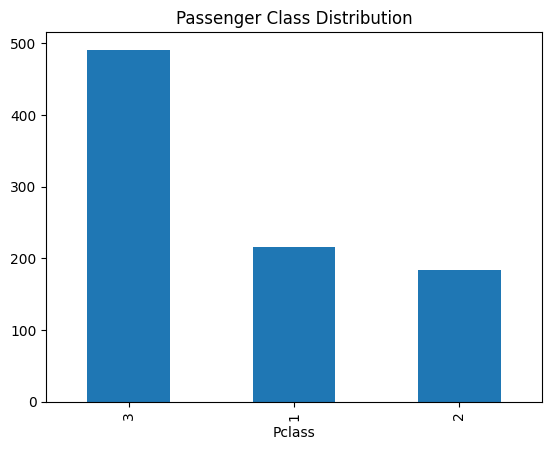

In [18]:
#pclass bar chart
df["Pclass"].value_counts().plot(kind="bar")
plt.title("Passenger Class Distribution")
plt.show()


⭐ 5. Passenger Class Distribution
✔ Observations:

- Third class (Pclass = 3) has the most passengers (~490).

- First class: ~210

- Second class: ~180

✔ Meaning:

- Titanic carried mostly lower-class passengers (immigrants).

- This class imbalance affects survival trends.

- Third class suffered the highest death count historically.

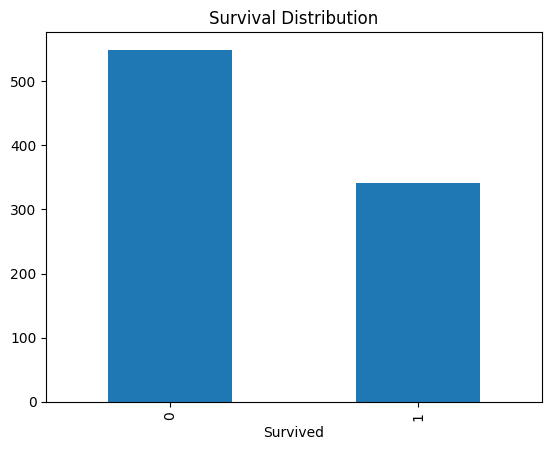

In [19]:
#Survived - Bar chart
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Distribution")
plt.show()


⭐ 6. Survival Distribution
✔ Observations:

- Majority died (~550).

- Survivors (~340).

- Imbalance: survivors = only 38%.

✔ Meaning:

- Target variable is imbalanced, important for ML later.

- Titanic tragedy is reflected clearly in this skew.

##OVERALL UNIVARIATE SUMMARY
Titanic dataset is dominated by young adults (20–40), low-fare passengers, and individuals traveling alone. Fare distribution is highly skewed, showing the gap between rich first-class travelers and poorer immigrants. Most passengers were in 3rd class. The dataset is imbalanced with more deaths than survivors. Several columns (SibSp, Parch) contain notable outliers, while Age contains many missing values.

# STEP:3 - CATEGORICAL ANALYSIS

<Axes: xlabel='Embarked'>

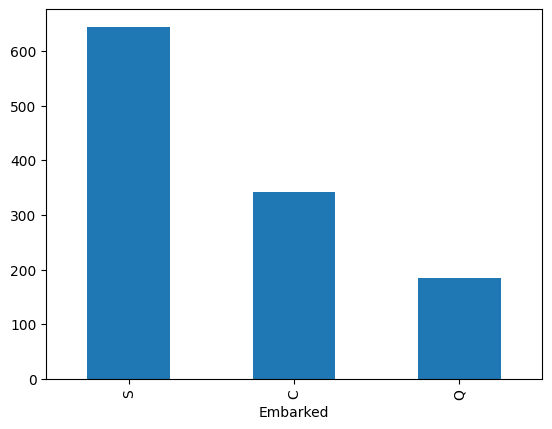

In [20]:
df["Sex"].value_counts().plot(kind="bar")



<Axes: xlabel='Survived'>

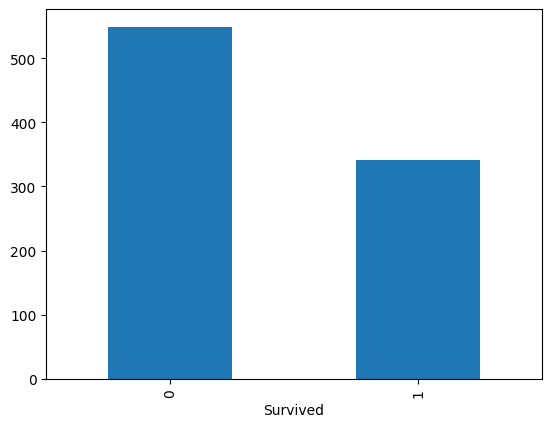

In [21]:
df["Survived"].value_counts().plot(kind="bar")


<Axes: xlabel='Pclass'>

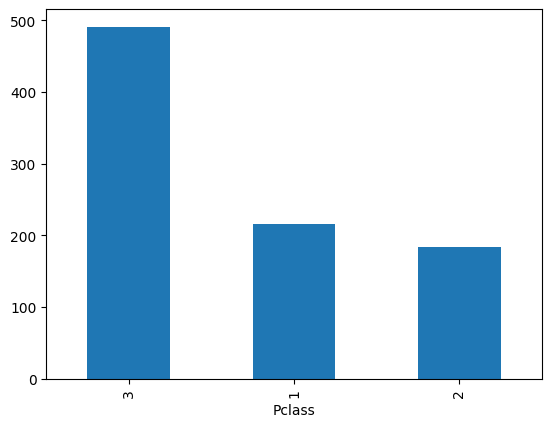

In [22]:
df["Pclass"].value_counts().plot(kind="bar")


<Axes: xlabel='Embarked'>

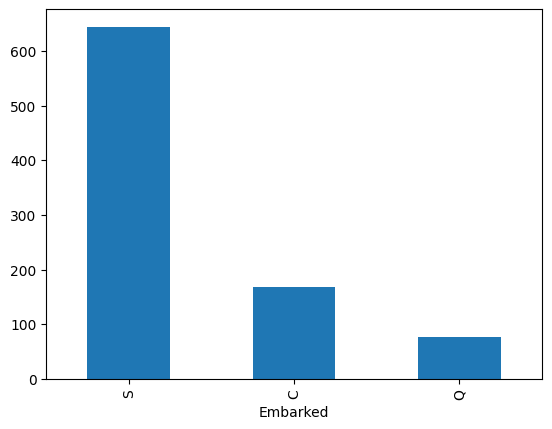

In [23]:
df["Embarked"].value_counts().plot(kind="bar")

<Axes: xlabel='Sex', ylabel='count'>

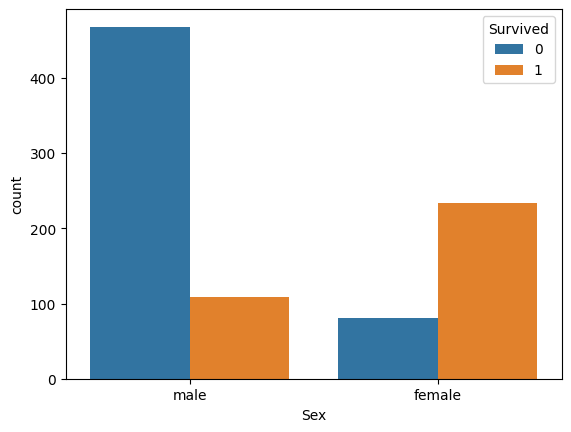

In [24]:
sns.countplot(x="Sex", hue="Survived", data=df)



<Axes: xlabel='Pclass', ylabel='count'>

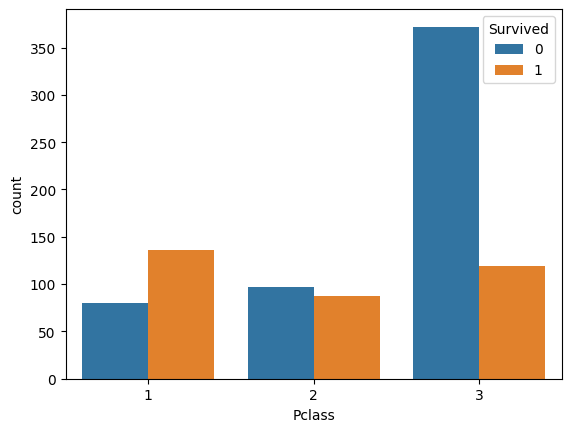

In [25]:
sns.countplot(x="Pclass", hue="Survived", data=df)


<Axes: xlabel='Embarked', ylabel='count'>

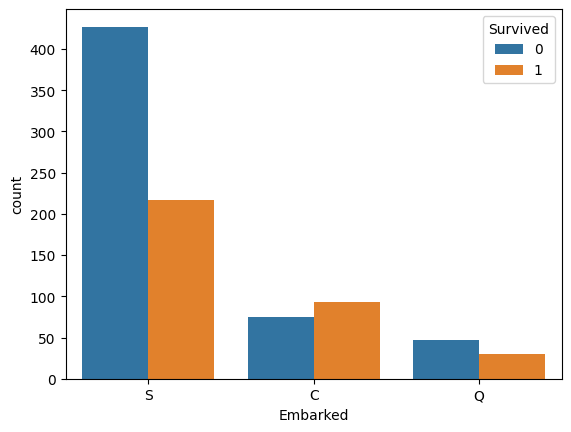

In [26]:
sns.countplot(x="Embarked", hue="Survived", data=df)

In [27]:
df.groupby("Sex")["Survived"].mean()



,Survived
Sex,
female,0.742038
male,0.188908


In [28]:
df.groupby("Pclass")["Survived"].mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [29]:
df.groupby("Embarked")["Survived"].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


#STEP:4 - BUVARIATE EDA (Survival VS Numeric Features)

<Axes: xlabel='Age', ylabel='Density'>

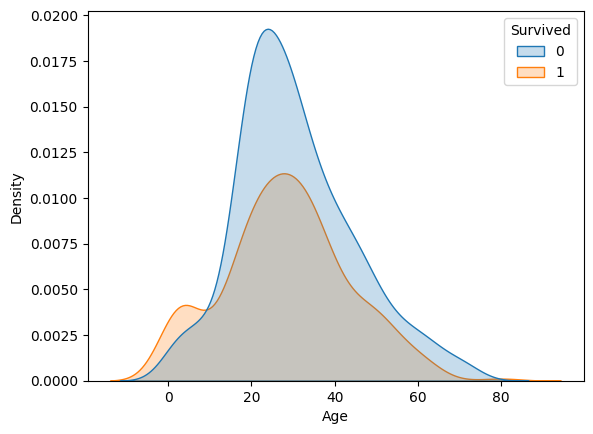

In [30]:
#Survival vs Age
sns.kdeplot(data=df, x="Age", hue="Survived", fill=True)

What you should observe

- Survivors have more people in the 0–12 (children) range.

- Middle-aged adults (20–40) have mixed survival.

- Elderly (60+) survive less.

Insight

→ Children had higher priority to rescue.

<Axes: xlabel='Survived', ylabel='Fare'>

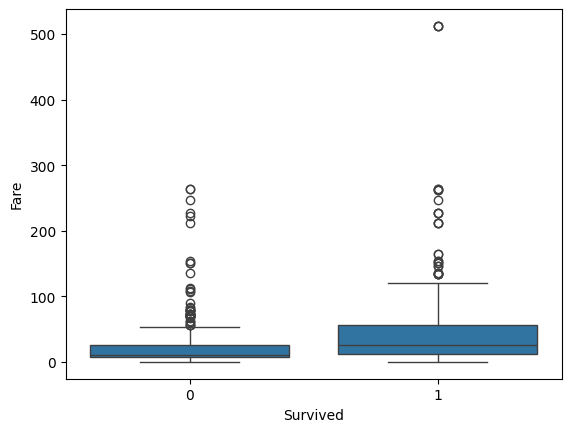

In [31]:
#Survival vs Fare
sns.boxplot(x="Survived", y="Fare", data=df)

Observation

- Median fare for survivors is much higher.

- Many high-fare passengers survived.

Insight

→ Fare is indirectly showing wealth. Rich passengers survived more.

<Axes: xlabel='Pclass', ylabel='count'>

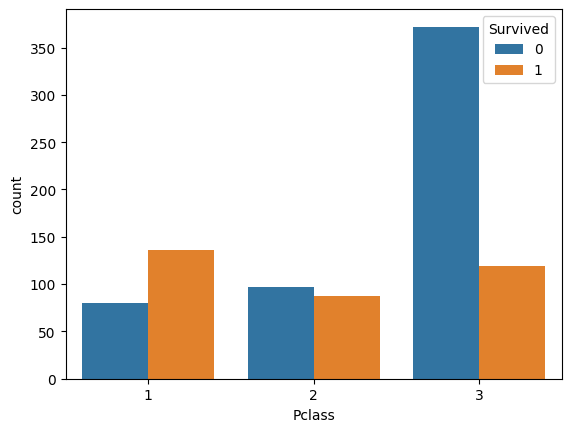

In [34]:
#Survival vs Pclass
sns.countplot(x="Pclass", hue="Survived" ,data=df)

Insight

→ 1st Class survived the most → 3rd Class survived the least.

<Axes: xlabel='SibSp', ylabel='Survived'>

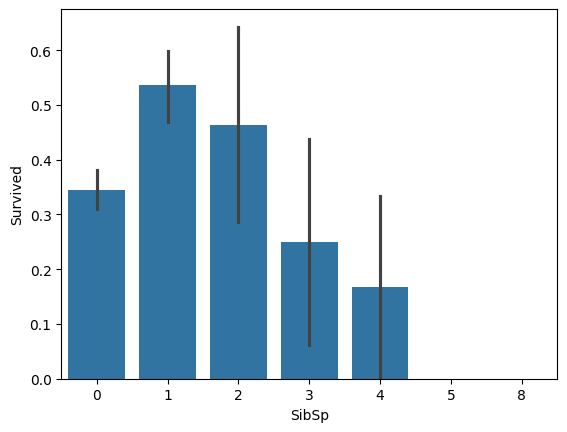

In [35]:
#Survival vs SibSp
sns.barplot(x="SibSp", y="Survived", data=df)

Observation

- People with 1 sibling/spouse survive more.

- People with 4+ siblings have almost zero survival.

Insight

→ Too large families couldn’t escape easily.

<Axes: xlabel='Parch', ylabel='Survived'>

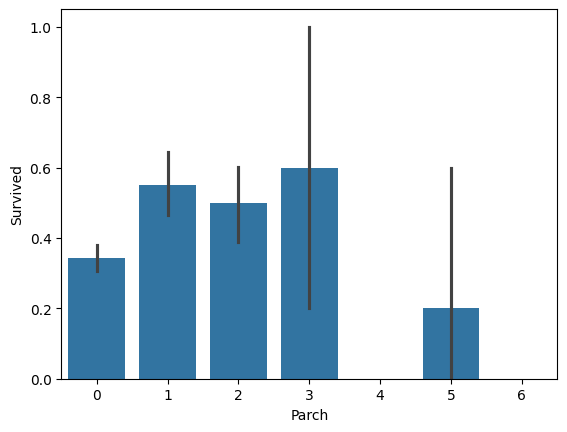

In [37]:
#Survival vs Parch
sns.barplot(x="Parch", y="Survived",data=df)

Observation

- People with 1–2 parents/children have better survival.

- People traveling alone (0) or huge families (4–6) survive less.

Insight

→ Small family groups were easier to rescue.

#STEP:5 - CORRELATION ANALYSIS

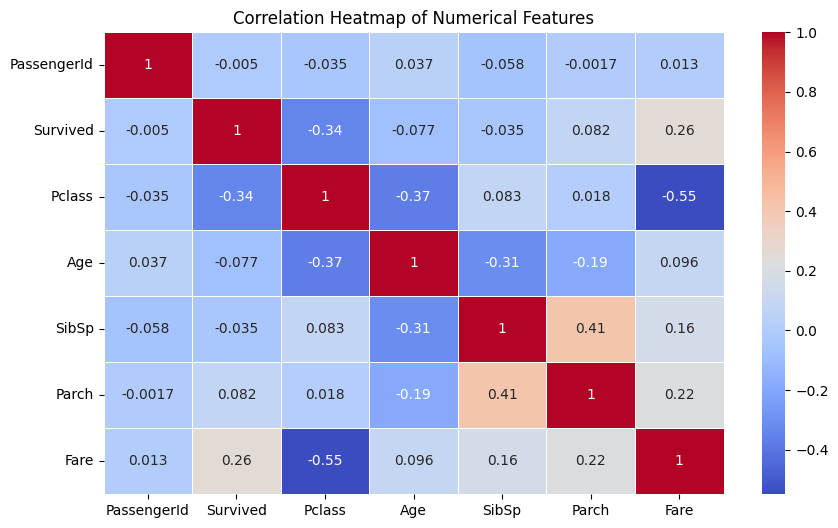

In [39]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


📌 Correlation Analysis — Key Insights

After generating the correlation heatmap, we observe the following important relationships:

1. Pclass vs Fare → Strong Negative Correlation (around –0.60)

- As passenger class number increases (1 → 2 → 3), the fare decreases.

- Meaning: 1st class passengers paid much more than 2nd and 3rd class.

- Confirms a strong link between socioeconomic status and travel class.

2. Survived vs Fare → Positive Correlation (around +0.23)

- Higher fare passengers were more likely to survive.

- Wealthy passengers had better cabins and easier access to lifeboats.

- Fare indirectly acts as a survival predictor.

3. Survived vs Pclass → Negative Correlation (around –0.24)

- 1st class passengers survived the most

- 3rd class passengers survived the least

- Pclass is one of the strongest indicators of survival.

4. Survived vs Age → Weak Negative Correlation (around –0.11)

- Younger passengers show slightly better survival.

- But age is not a strong predictor by itself.

- Children (age < 12) had special evacuation priority.

5. SibSp vs Parch → Moderate Positive Correlation (around +0.41)

- Families traveling together show connected patterns (siblings + parents).

- Useful for creating a famHBVHBVy_size feature later.

**Summary of Insights**

- Fare and Pclass show the strongest relationships.

- Gender, although not in the heatmap (categorical), remains the most powerful feature overall (as seen earlier).

- Correlation confirms that Titanic survival was shaped by:
sex, class, wealth, and age.